# Regression Casestudy

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Importing the dataset

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.8 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

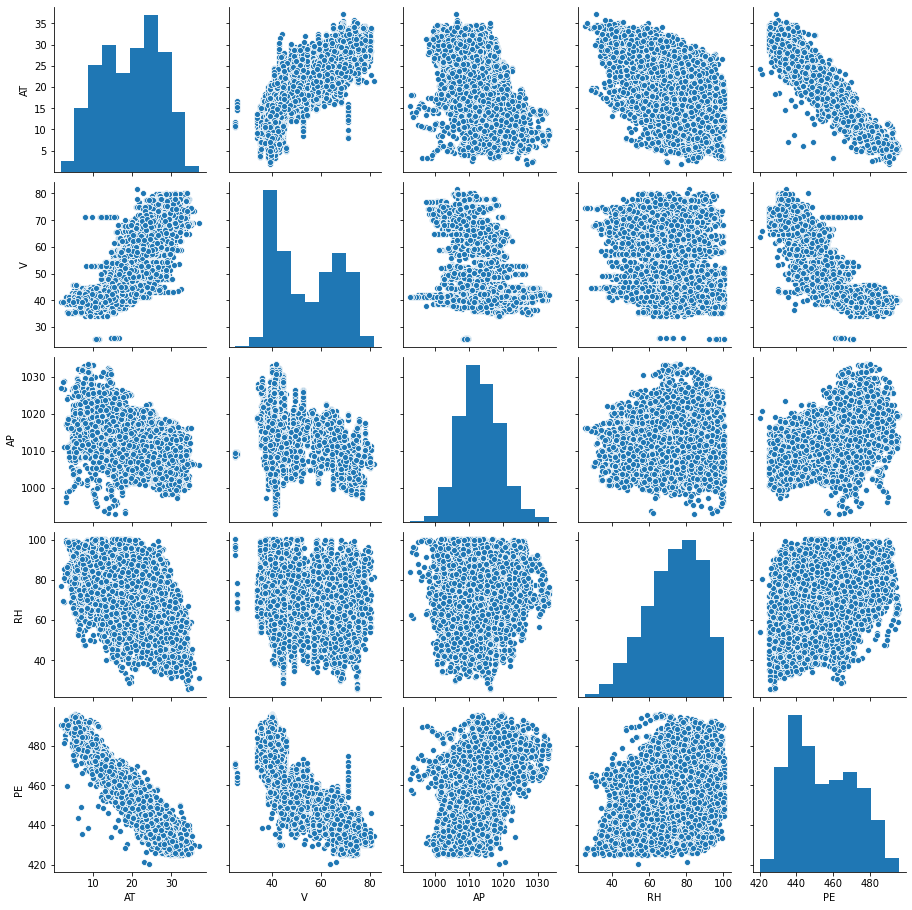

In [5]:
sns.pairplot(df)

In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


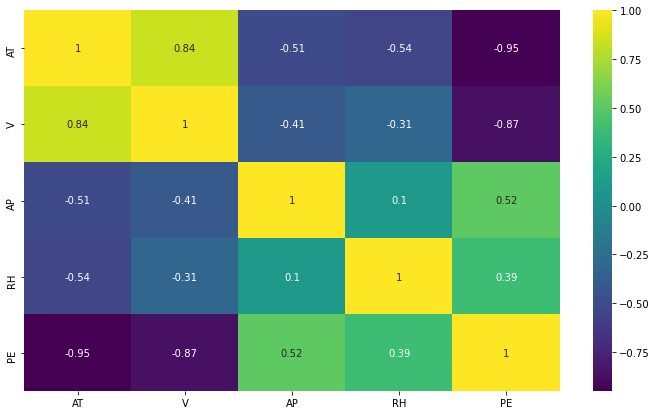

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

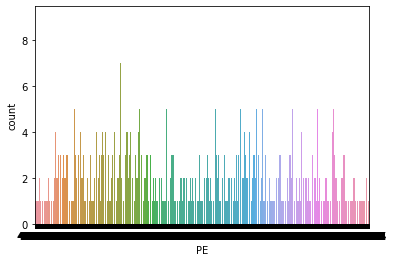

In [9]:
sns.countplot(x='PE',data=df)

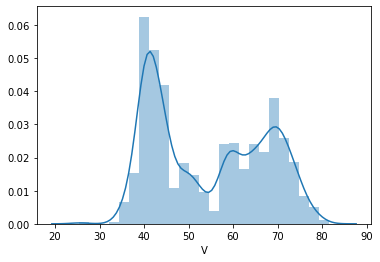

In [10]:
sns.distplot(df['V'])

In [11]:
df.corr()['PE'].sort_values()

AT   -0.948128
V    -0.869780
RH    0.389794
AP    0.518429
PE    1.000000
Name: PE, dtype: float64

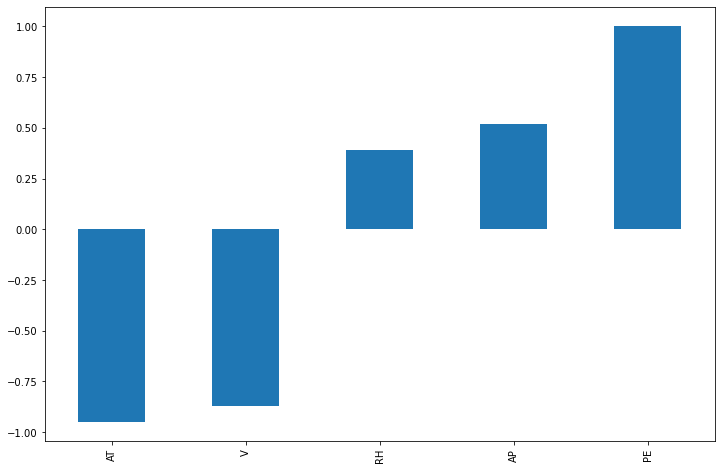

In [12]:
plt.figure(figsize=(12,8))
df.corr()['PE'].sort_values().plot(kind='bar')

## Splitting the dataset into the Training set and Test set

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

## Feature Scaling

In [15]:
sc =StandardScaler()
xtrain= sc.fit_transform(xtrain)
xtest =sc.transform(xtest)

## Training & Evaluating the Model Performance

In [16]:
models = []
models.append(('Lreg',LinearRegression()))
models.append(('SVM',SVR(kernel='rbf')))
models.append(('DTC',DecisionTreeRegressor()))
models.append(('RFC',RandomForestRegressor(n_estimators=11)))

for name,model in models:
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f'{name}\n R2: {r2_score(ytest,ypred)}\nMSE:-{mean_squared_error(ytest,ypred)}\nRMSE:-{np.sqrt(mean_squared_error(ytest,ypred))}\n')
    

Lreg
 R2: 0.9323789104734466
MSE:-19.83215767169477
RMSE:-4.453331075913262

SVM
 R2: 0.9431165217500584
MSE:-16.68299220651082
RMSE:-4.084481877363495

DTC
 R2: 0.9201036081854319
MSE:-23.4323027173913
RMSE:-4.840692379958811

RFC
 R2: 0.9603444277053546
MSE:-11.630329647378323
RMSE:-3.410326912097772



## Model Optimization

In [17]:
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=10,random_state=0)
    cvs = cross_val_score(model,xtrain,ytrain,cv=kfold)
    results.append(cvs)
    names.append(name)
    print(f'{name}: {cvs.mean()*100}%  {cvs.std()*100}%')

Lreg: 92.71477278803033%  0.5189162164645483%
SVM: 93.81338750703085%  0.5332977666592869%
DTC: 92.27533985660905%  1.2229986141673561%
RFC: 95.53530797965409%  0.6177692498344504%
